# Vectorized Feed Forward Network

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hemendrarajawat/World-With-Deep-Learning/blob/master/notebooks/Vectorized%20Feed%20Forward%20Network.ipynb)

## Import Libaries

In [0]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from matplotlib.colors import LinearSegmentedColormap

np.random.seed(0)
cmap = LinearSegmentedColormap.from_list('', ['red', 'yellow', 'green'])

## What is Vectorized?

Vectorisation aka Array programming is a style of computer programming where operations are applied to whole arrays instead of individual elements.

## Benefits of Vectorization:

1.   Take less computational time
2.   Eaily readable and managable due to less no of lines


Let's take some example to prove above two points

### Vectorization and Scalar Comparision

In [0]:
# Generating the data

N = 100
M = 200

a = np.random.randn(N, M)
b = np.random.randn(N, M)
c = np.zeros((N, M))

In [3]:
%%time

# Calculating sum in scalar fashion
for i in range(N):
  for j in range(M):
    c[i, j] = a[i, j] + b[i, j]

CPU times: user 13.5 ms, sys: 909 µs, total: 14.4 ms
Wall time: 15.9 ms


In [4]:
%%time

# Calculating the sum in vectorized fashion
c = a + b

CPU times: user 150 µs, sys: 29 µs, total: 179 µs
Wall time: 185 µs


You can see that in the simple addition, the scalar approach took 18.5 ms and the vectorized took only 479 µs. Which is almost more than 18 times faster. 

This is the true power of Vectorisation computing.

Let's take one more example.

In [5]:
%%time

# Scalar approach
for i in range(N):
  for j in range(M):
    c[i, j] = np.sin(a[i, j] + b[i, j])

CPU times: user 41 ms, sys: 395 µs, total: 41.4 ms
Wall time: 41.7 ms


In [6]:
%%time

## Vectorized approach
c = np.sin(a + b)

CPU times: user 901 µs, sys: 981 µs, total: 1.88 ms
Wall time: 1.54 ms


Yes, with the time difference of more than 45 ms, the code is easily readable and managable.

Now, we will use the vectorisation approach in training the model for faster computational. But before that we will see the traning of model with scalar approach.

## Generating the data

In [0]:
data, labels = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=0)

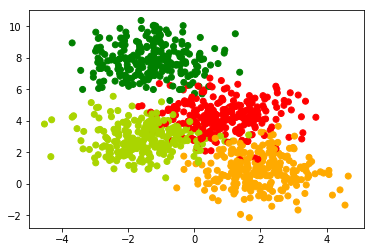

In [8]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=cmap)
plt.show()

## Train-Test Split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify=labels, random_state=0, test_size=0.4)

## One Hot Encoding

In [10]:
OHEncoder = OneHotEncoder()
Y_OH_train = OHEncoder.fit_transform(Y_train.reshape(-1, 1)).toarray()
Y_OH_test = OHEncoder.transform(Y_test.reshape(-1, 1)).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [11]:
print(Y_OH_train[0], Y_train[0])
print(Y_OH_test[0], Y_test[0])

[0. 0. 1. 0.] 2
[0. 0. 0. 1.] 3


## Setting the context

<image src="https://raw.githubusercontent.com/hemendrarajawat/World-With-Deep-Learning/master/Images/FeedForwardNetwork1.png" height="350"/>

Let's assume we have this simple neural network and for this we will calculate the time taken for the model to train in both the Scalar and Vectorized approach.

### Scalar Version FFN Class

In [0]:
class FF_MultiClass_Scalar:
  
  def __init__(self, W1, W2):
    self.w1 = W1[0][0].copy()
    self.w2 = W1[1][0].copy()
    self.w3 = W1[0][1].copy()
    self.w4 = W1[1][1].copy()
    self.w5 = W2[0][0].copy()
    self.w6 = W2[1][0].copy()
    self.w7 = W2[0][1].copy()
    self.w8 = W2[1][1].copy()
    self.w9 = W2[0][2].copy()
    self.w10 = W2[1][2].copy()
    self.w11 = W2[0][3].copy()
    self.w12 = W2[1][3].copy()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
    self.b6 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    # input layer
    self.x1, self.x2 = x
    
    # hidden layer
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    
    # output layer
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
    self.a5 = self.w9*self.h1 + self.w10*self.h2 + self.b5
    self.a6 = self.w11*self.h1 + self.w12*self.h2 + self.b5
    sum_exps = np.sum([np.exp(self.a3), np.exp(self.a4), np.exp(self.a5), np.exp(self.a6)])
    self.h3 = np.exp(self.a3)/sum_exps
    self.h4 = np.exp(self.a4)/sum_exps
    self.h5 = np.exp(self.a5)/sum_exps
    self.h6 = np.exp(self.a6)/sum_exps
    
    return np.array([self.h3, self.h4, self.h5, self.h6])
  
  def grad(self, x, y):
    self.forward_pass(x)
    self.y1, self.y2, self.y3, self.y4 = y
    
    self.da3 = (self.h3-self.y1)
    self.da4 = (self.h4-self.y2)
    self.da5 = (self.h5-self.y3)
    self.da6 = (self.h6-self.y4)
    
    self.dw5 = self.da3*self.h1
    self.dw6 = self.da3*self.h2
    self.db3 = self.da3
    
    self.dw7 = self.da4*self.h1
    self.dw8 = self.da4*self.h2
    self.db4 = self.da4
    
    self.dw9 = self.da5*self.h1
    self.dw10 = self.da5*self.h2
    self.db5 = self.da5
    
    self.dw11 = self.da6*self.h1
    self.dw12 = self.da6*self.h2
    self.db6 = self.da6
    
    self.dh1 = self.da3*self.w5 + self.da4*self.w7 + self.da5*self.w9 + self.da6*self.w11
    self.dh2 = self.da3*self.w6 + self.da4*self.w8 + self.da5*self.w10 + self.da6*self.w12
    
    self.da1 = self.dh1 * self.h1*(1-self.h1)
    self.da2 = self.dh2 * self.h2*(1-self.h2)
    
    self.dw1 = self.da1*self.x1
    self.dw2 = self.da1*self.x2
    self.db1 = self.da1
    
    self.dw3 = self.da2*self.x1
    self.dw4 = self.da2*self.x2
    self.db2 = self.da2
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False, display_weight=False):
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, dw11, dw12, db1, db2, db3, db4, db5, db6  = [0]*18
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        dw11 += self.dw11
        dw12 += self.dw12
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db4 += self.db4
        db2 += self.db5
        db3 += self.db6
        
      m = X.shape[0]
      self.w1 -= (learning_rate * (dw1 / m))
      self.w2 -= (learning_rate * (dw2 / m))
      self.w3 -= (learning_rate * (dw3 / m))
      self.w4 -= (learning_rate * (dw4 / m))
      self.w5 -= (learning_rate * (dw5 / m))
      self.w6 -= (learning_rate * (dw6 / m))
      self.w7 -= (learning_rate * (dw7 / m))
      self.w8 -= (learning_rate * (dw8 / m))
      self.w9 -= (learning_rate * (dw9 / m))
      self.w10 -= (learning_rate * (dw10 / m))
      self.w11 -= (learning_rate * (dw11 / m))
      self.w12 -= (learning_rate * (dw12 / m))
      self.b1 -= (learning_rate * (db1 / m))
      self.b2 -= (learning_rate * (db2 / m))
      self.b3 -= (learning_rate * (db3 / m))
      self.b4 -= (learning_rate * (db4 / m))
      self.b5 -= (learning_rate * (db5 / m))
      self.b6 -= (learning_rate * (db6 / m))
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
    
    if display_loss:
      Wt1 = [[self.w1, self.w3], [self.w2, self.w4]]
      Wt2 = [[self.w5, self.w6, self.w7, self.w8], [self.w9, self.w10, self.w11, self.w12]]
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

### Weight Vectorized Version FFN Class

In [0]:
class FF_MultiClass_WeightVectorised:
  
  def __init__(self, W1, W2):
    self.W1 = W1.copy()
    self.W2 = W2.copy()
    self.B1 = np.zeros((1,2))
    self.B2 = np.zeros((1,4))
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def softmax(self, x):
    exps = np.exp(x)
    return exps / np.sum(exps)
  
  def forward_pass(self, x):
    x = x.reshape(1, -1) # (1, 2)
    self.A1 = np.matmul(x,self.W1) + self.B1  # (1, 2) * (2, 2) -> (1, 2)
    self.H1 = self.sigmoid(self.A1) # (1, 2)
    self.A2 = np.matmul(self.H1, self.W2) + self.B2 # (1, 2) * (2, 4) -> (1, 4) 
    self.H2 = self.softmax(self.A2) # (1, 4)
    return self.H2
    
  def grad_sigmoid(self, x):
    return x*(1-x) 
  
  def grad(self, x, y):
    self.forward_pass(x)
    x = x.reshape(1, -1) # (1, 2)
    y = y.reshape(1, -1) # (1, 4)
    
    self.dA2 = self.H2 - y # (1, 4) 
    
    self.dW2 = np.matmul(self.H1.T, self.dA2) # (2, 1) * (1, 4) -> (2, 4)
    self.dB2 = self.dA2 # (1, 4)
    self.dH1 = np.matmul(self.dA2, self.W2.T) # (1, 4) * (4, 2) -> (1, 2)
    self.dA1 = np.multiply(self.dH1, self.grad_sigmoid(self.H1)) # -> (1, 2)
    
    self.dW1 = np.matmul(x.T, self.dA1) # (2, 1) * (1, 2) -> (2, 2)
    self.dB1 = self.dA1 # (1, 2)

  
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW1 = np.zeros((2,2))
      dW2 = np.zeros((2,4))
      dB1 = np.zeros((1,2))
      dB2 = np.zeros((1,4))
      for x, y in zip(X, Y):
        self.grad(x, y)
        dW1 += self.dW1
        dW2 += self.dW2
        dB1 += self.dB1
        dB2 += self.dB2  
        
      m = X.shape[0]
      self.W2 -= learning_rate * (dW2/m)
      self.B2 -= learning_rate * (dB2/m)
      self.W1 -= learning_rate * (dW1/m)
      self.B1 -= learning_rate * (dB1/m)

      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
        
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()

### Input & Weight Vectorized Version FFN Class

In [0]:
class FF_MultiClass_InputWeightVectorised:
  
  def __init__(self, W1, W2):
    self.W1 = W1.copy()
    self.W2 = W2.copy()
    self.B1 = np.zeros((1,2))
    self.B2 = np.zeros((1,4))
  
  def sigmoid(self, X):
    return 1.0/(1.0 + np.exp(-X))
  
  def softmax(self, X):
    exps = np.exp(X)
    return exps / np.sum(exps, axis=1).reshape(-1,1)
  
  def forward_pass(self, X):
    self.A1 = np.matmul(X,self.W1) + self.B1 # (N, 2) * (2, 2) -> (N, 2)
    self.H1 = self.sigmoid(self.A1) # (N, 2)
    self.A2 = np.matmul(self.H1, self.W2) + self.B2 # (N, 2) * (2, 4) -> (N, 4)
    self.H2 = self.softmax(self.A2) # (N, 4)
    return self.H2
    
  def grad_sigmoid(self, X):
    return X*(1-X) 
  
  def grad(self, X, Y):
    self.forward_pass(X)
    m = X.shape[0]
    
    self.dA2 = self.H2 - Y # (N, 4) - (N, 4) -> (N, 4)
    
    self.dW2 = np.matmul(self.H1.T, self.dA2) # (2, N) * (N, 4) -> (2, 4)
    self.dB2 = np.sum(self.dA2, axis=0).reshape(1, -1) # (N, 4) -> (1, 4)
    self.dH1 = np.matmul(self.dA2, self.W2.T) # (N, 4) * (4, 2) -> (N, 2)
    self.dA1 = np.multiply(self.dH1, self.grad_sigmoid(self.H1)) # (N, 2) .* (N, 2) -> (N, 2)
    
    self.dW1 = np.matmul(X.T, self.dA1) # (2, N) * (N, 2) -> (2, 2)
    self.dB1 = np.sum(self.dA1, axis=0).reshape(1, -1) # (N, 2) -> (1, 2)

      
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      self.grad(X, Y) # X -> (N, 2), Y -> (N, 4)
        
      m = X.shape[0]
      self.W2 -= learning_rate * (self.dW2/m)
      self.B2 -= learning_rate * (self.dB2/m)
      self.W1 -= learning_rate * (self.dW1/m)
      self.B1 -= learning_rate * (self.dB1/m)

      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
    
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
      
  
  def predict(self, X):
    Y_pred = self.forward_pass(X)
    return np.array(Y_pred).squeeze()

## Training the models

Let's first initialize the weight randomly and we will use the same starting weight for all the models, just to make sure that all the computational comparisional is fair.

In [15]:
W1 = np.random.randn(2,2)
W2 = np.random.randn(2,4)
print(W1)
print(W2)

[[-1.93950036  0.73885045]
 [ 1.39468453 -0.81358502]]
[[-0.818822   -0.1027978   1.23934523  0.3642774 ]
 [-1.16663743 -0.50382808  0.11141039 -1.53470286]]


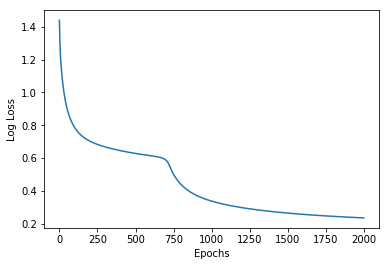

Time taken by model 1: 103.52628350257874


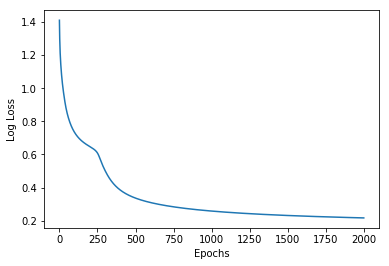

Time taken by model 2: 72.10451936721802


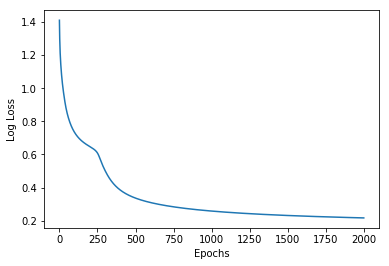

Time taken by model 3: 3.0088133811950684


In [17]:
models_init = [FF_MultiClass_Scalar(W1, W2), FF_MultiClass_WeightVectorised(W1, W2),FF_MultiClass_InputWeightVectorised(W1, W2)]
models = []
for idx, model in enumerate(models_init, start=1):
  tic = time.time()
  ffsn_multi_specific = model
  ffsn_multi_specific.fit(X_train, Y_OH_train, epochs=2000, learning_rate=.5, display_loss=True)
  models.append(ffsn_multi_specific)
  toc = time.time()
  print("Time taken by model {}: {}".format(idx, toc-tic))

## Validating the models

In [20]:
for idx, model in enumerate(models, start=1):
  Y_pred_train = model.predict(X_train)
  Y_pred_train = np.argmax(Y_pred_train,1)

  Y_pred_val = model.predict(X_test)
  Y_pred_val = np.argmax(Y_pred_val,1)

  accuracy_train = accuracy_score(Y_pred_train, Y_train)
  accuracy_val = accuracy_score(Y_pred_val, Y_test)
  
  print("Model {}".format(idx))
  print("Training accuracy", round(accuracy_train, 2))
  print("Validation accuracy", round(accuracy_val, 2))

Model 1
Training accuracy 0.92
Validation accuracy 0.94
Model 2
Training accuracy 0.91
Validation accuracy 0.93
Model 3
Training accuracy 0.91
Validation accuracy 0.93


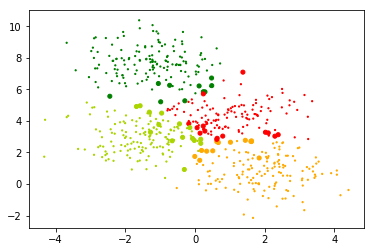

In [22]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
plt.show()

## Conclusion

We can clearly see the computational time difference is significantly large and that's why all the models use Vectorized computational. 

We can train the models in very less time, that's why the Deep Learning is so popular and successful.